## First of All...

If you are using this notebook from Google Colab, you need to fetch the necessary resources by running:

In [3]:
!wget https://raw.githubusercontent.com/lompabo/bbs2019dtm/master/lab03/resources.tgz
!tar -xzf resources.tgz
!pip install pillow
!pip install prince
!pip install fastdtw
!pip install pyproj

--2019-05-28 09:02:54--  https://raw.githubusercontent.com/lompabo/bbs2019dtm/master/lab03/resources.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.12.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.12.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26847214 (26M) [application/octet-stream]
Saving to: ‘resources.tgz.1’

resources.tgz.1      13%[=>                  ]   3.37M   329KB/s    eta 61s    ^C
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


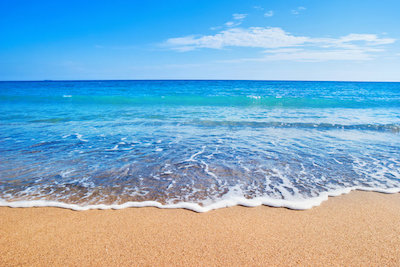

In [5]:
%matplotlib inline

#
# REQUIRED FOR THIS NOTEBOOK:
# pip3 install Pillow
#

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from PIL import Image


# Read data
X = Image.open('resources/sea_small.jpg')
X

In [6]:
# Convert to a numpy array
X = np.array(X)
# Reshape
Xshape = X.shape
X = X.reshape(-1, 3)

In [7]:
from sklearn.cluster import KMeans

# Build a clustering object
cls = KMeans(16)
# Train
cls.fit(X)
# Find cluster for each data point
y = cls.labels_

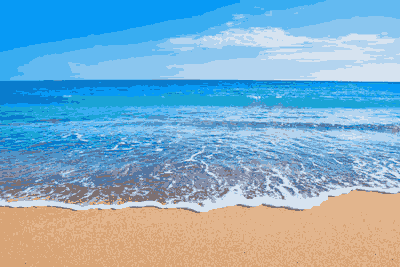

In [9]:
# Round the centroids
centroids = cls.cluster_centers_.astype(np.uint8)
# Replace colors with centroids
X2 = np.take(centroids, y, axis=0)
# Reshape
X2 = X2.reshape(Xshape)
X2 = Image.fromarray(X2)
X2